In [ ]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
base_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Healthcare Patient.xlsx')
base_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,Kyle Perez,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [ ]:
base_data.shape

(55500, 15)

In [ ]:
# Check for missing values
missing_values = base_data.isnull().sum()
missing_values[missing_values > 0]


,0


In [ ]:

# Summary statistics for numerical columns
numerical_summary = base_data.describe()
print("Numerical Colums Summary")
print(numerical_summary)

print("\n")
print("\n")
# Summary statistics for categorical columns
categorical_summary = base_data.describe(include="object")
print("Categorical Colums Summary")
print(categorical_summary)


Numerical Colums Summary
                Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25539.316097   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 00:00:00    13241.224652   
50%       52.000000            2021-11-01 00:00:00    25538.069376   
75%       68.000000            2023-02-03 00:00:00    37820.508436   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.602454                            NaN    14211.454431   

        Room Number                 Discharge Date  Day of Admission  \
count  55500.000000                          55500      55500.000000   
mean     301.134829  2021-11-16 13:15:20.821621504          2.998955   
min      101.000000            2019-05-09 00:00:00          0.000000   
25%      202.000000            2020-08-12 00:00:00      

In [ ]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
# modifying the date and time into standard form
base_data['Date of Admission'] = pd.to_datetime(base_data['Date of Admission']).dt.date.astype('datetime64[ns]')
base_data['Discharge Date'] = pd.to_datetime(base_data['Discharge Date']).dt.date.astype('datetime64[ns]')

In [ ]:
base_data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


for the **Date of Admission** and **Discharge Date**, storing the weekdays (like Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday) only into a variable

In [ ]:
base_data['Day of Admission'] = base_data['Date of Admission'].dt.day_name()
base_data['Day of Discharge'] = base_data['Discharge Date'].dt.day_name()
base_data['Day of Admission'].value_counts()

,count
Day of Admission,
Thursday,7989
Tuesday,7982
Wednesday,7950
Sunday,7920
Saturday,7901
Friday,7892
Monday,7866


In [ ]:
base_data['Day of Discharge'].value_counts()

,count
Day of Discharge,
Thursday,8029
Friday,8019
Wednesday,7970
Sunday,7926
Saturday,7895
Monday,7882
Tuesday,7779


Or else we can use **dayofweek** function of pandas where **Monday=0,......, Sunday=6**

In [ ]:
base_data['Day of Admission'] = base_data['Date of Admission'].dt.dayofweek
base_data['Day of Discharge'] = base_data['Discharge Date'].dt.dayofweek
base_data['Day of Admission'].value_counts()

,count
Day of Admission,
3,7989
1,7982
2,7950
6,7920
5,7901
4,7892
0,7866


In [ ]:
base_data['Day of Discharge'].value_counts()

,count
Day of Discharge,
3,8029
4,8019
2,7970
6,7926
5,7895
0,7882
1,7779


In [ ]:
base_data.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date,Day of Admission,Day of Discharge
count,55500.000000,55500,55500.000000,55500.000000,55500,55500.000000,55500.000000
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504,2.998955,3.007441
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00,0.000000,0.000000
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00,1.000000,1.000000
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00,3.000000,3.000000
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00,5.000000,5.000000
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00,6.000000,6.000000
std,19.602454,NaN,14211.454431,115.243069,NaN,1.997530,1.995300


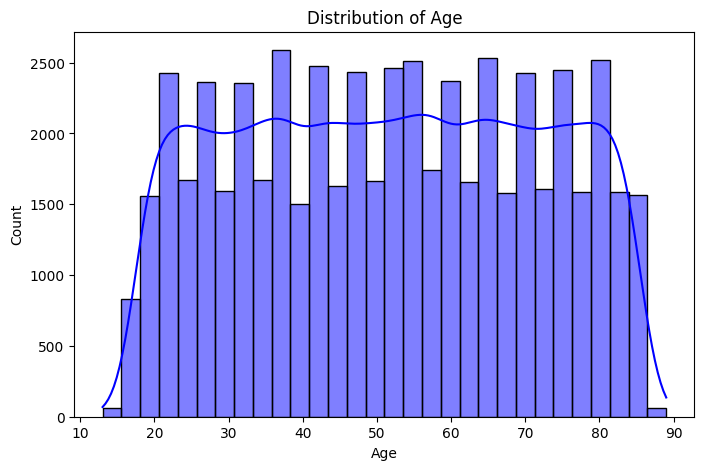

In [ ]:
# Histogram of Age
plt.figure(figsize=(8, 5))
sns.histplot(base_data['Age'], bins=30, kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# **Analysis & Insights:**
1. **Understanding the Shape of Age Distribution**

  * A normal (bell-shaped) distribution suggests an even spread of patients across all ages.
  * A right-skewed distribution (more younger patients) means younger people seek healthcare more often.
  * A left-skewed distribution (more older patients) suggests an aging population or a higher need for elderly care.

2. **Identifying the Most Common Age Group:**

  * The peak (mode) of the histogram represents the age group with the highest number of patients.
  * If the majority are older patients (e.g., 50+ years), the hospital might be specializing in chronic diseases.
  * If younger patients (e.g., 20–30 years) dominate, the hospital may focus on preventive and general healthcare.

3. **Detecting Outliers or Rare Age Groups:**

  * If there are very young (e.g., infants) or very old patients (90+ years) in small numbers, they could be edge cases requiring specialized care.
  * A gap in certain age groups might indicate missing data or that a particular age demographic rarely seeks treatment.

4. **Comparing Against Healthcare Trends:**

  * Elderly patients (above 60 years) tend to have chronic conditions like diabetes, heart disease, or cancer.
  * Young adults (20–40 years) might visit hospitals for maternity, accidents, or preventive care.

5. **Policy & Hospital Strategy Implications:**

  * If a hospital sees more older patients, it may need geriatric care and chronic disease management programs.
  * If younger patients dominate, the focus should be on preventive healthcare, lifestyle management, and maternity care.



---


# **Final Takeaway:**
* The shape, peak, and spread of the age distribution tell us which age groups dominate hospital visits.
* Hospitals can adjust services and resources based on age demographics.
* This analysis helps in healthcare planning, resource allocation, and policy-making. 🚑

<ipython-input-28-5cf1f9cc2528>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




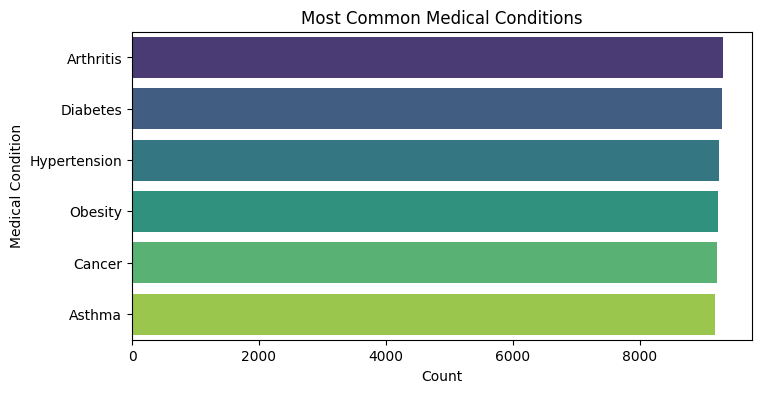

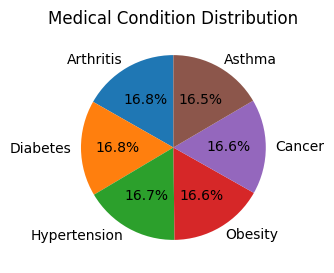

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y=base_data['Medical Condition'], order=base_data['Medical Condition'].value_counts().index, palette='viridis')
plt.title("Most Common Medical Conditions")
plt.xlabel("Count")
plt.ylabel("Medical Condition")
plt.show()
plt.figure(figsize=(3, 3))
base_data['Medical Condition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Medical Condition Distribution")
plt.ylabel('')  # Hide y-label
plt.show()


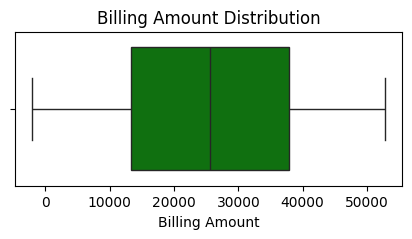

In [ ]:
plt.figure(figsize=(5, 2))
sns.boxplot(x=base_data['Billing Amount'], color='green')
plt.title("Billing Amount Distribution")
plt.show()

# # Histogram for Billing Amount
# plt.figure(figsize=(8, 5))
# sns.histplot(base_data['Billing Amount'], bins=30, kde=True, color='green')
# plt.title("Distribution of Billing Amount")
# plt.xlabel("Billing Amount")
# plt.ylabel("Count")
# plt.show()

## ***Analysis & Insights of Billing Amount Boxplot***

**1.Median & Interquartile Range (IQR)**
The middle line inside the box represents the median billing amount.
The box itself represents the interquartile range (IQR), covering the middle 50% of the billing data.

**2.Spread & Variability in Billing Amounts**
A wide box means a large variation in billing amounts among patients.
A narrow box suggests most patients have similar billing amounts.

**3.Outliers (Dots Outside the Whiskers)**
The dots outside the whiskers indicate patients with exceptionally high bills.
These could be due to high-cost surgeries, ICU stays, or specialized treatments.
Hospitals should analyze these cases to determine if the high charges are justified or potential overbilling.

**4.Skewness in Billing**
If the box is closer to one side and has a long right whisker, the distribution is right-skewed, meaning a few patients have very high bills.
A symmetrical boxplot suggests a balanced billing distribution.

**5.Healthcare Cost Implications**
A large billing variation may indicate different cost structures for different medical conditions.
If many patients have high bills, hospitals should consider insurance options or financial assistance programs to ensure affordability.

# **Final Takeaway:**
This boxplot helps identify billing trends, outliers, and cost variations, enabling hospitals to optimize pricing, reduce disparities, and ensure fair medical billing.

<ipython-input-47-53c4736e1fec>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




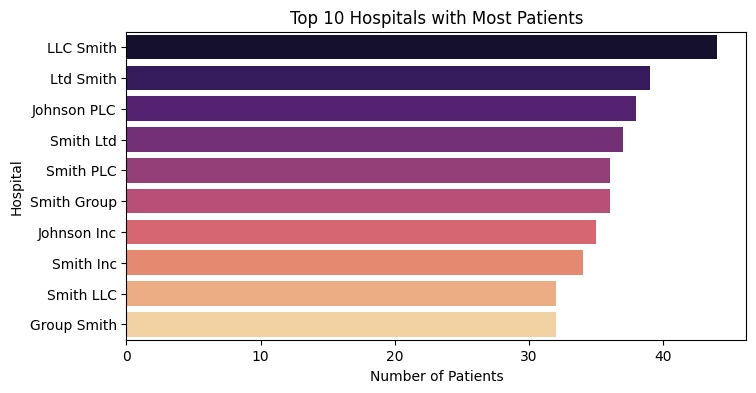

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(y=base_data['Hospital'], order=base_data['Hospital'].value_counts().index[:10], palette='magma')  # Top 10 hospitals
plt.title("Top 10 Hospitals with Most Patients")
plt.xlabel("Number of Patients")
plt.ylabel("Hospital")
plt.show()


# **Analysis and Insights**
This horizontal bar chart helps us understand which hospitals serve the most patients, providing insights into hospital capacity, popularity, and demand.

**1. Identifying the Most Visited Hospitals**


*   The hospital at the top of the chart has the highest number of patients.
* If certain hospitals have significantly higher patient numbers, they may be well-equipped, well-reputed, or centrally located.

**2. Capacity & Resource Allocation**


*  Hospitals with high patient numbers may experience longer wait times, higher staff workload, and potential overcrowding.
*  If some hospitals receive far fewer patients, they may have underutilized resources or be less preferred due to quality concerns, location, or reputation.



**3. Regional Healthcare Disparities**


*  If most top hospitals are in urban areas, it suggests a gap in rural healthcare accessibility
*  Policymakers should analyze if rural hospitals need better infrastructure, staffing, or funding


**4. Hospital Reputation & Patient Preference**


* High patient numbers might indicate trust in hospital services, experienced doctors, and better treatment facilities.
*   If a well-known hospital has lower patient numbers, it could be due to cost, accessibility issues, or specialized services that limit general admissions.

**5. Strategic Decision-Making for Healthcare Planning**


*   High-demand hospitals may need expansion, increased staff, or improved patient flow management.

*   Lower-traffic hospitals might require better outreach, partnerships, or service improvements to attract more patients.




# **Final Takeaway:**
This visualization helps hospitals and policymakers identify high-demand medical centers, allocate resources efficiently, and improve healthcare accessibility. **Hospitals with high patient loads may need expanded facilities, while underutilized hospitals may need better awareness campaigns or service improvements.**

In [ ]:
import plotly.graph_objects as go

# Count of each Admission Type
admission_counts = base_data['Admission Type'].value_counts()

# Create Donut Chart
fig = go.Figure(data=[go.Pie(
    labels=admission_counts.index,
    values=admission_counts.values,
    hole=0.4,  # Creates the donut effect
    textinfo='percent+label',
    marker=dict(colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
)])

fig.update_layout(title_text="Admission Type Distribution")
fig.show()


<ipython-input-35-36d218361ac2>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




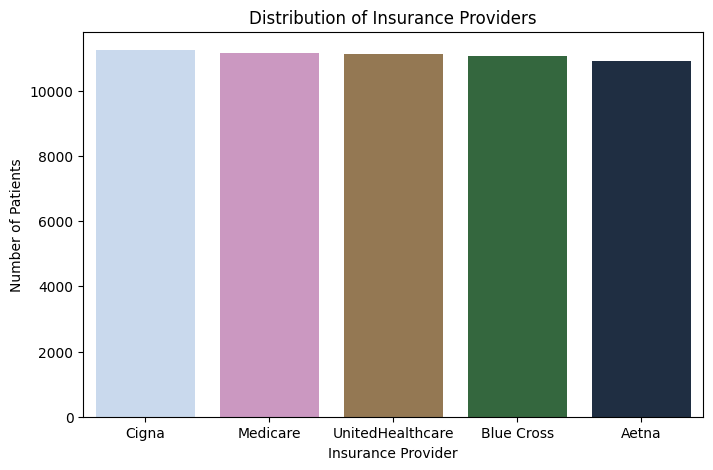

In [ ]:
# Count of Insurance Providers
plt.figure(figsize=(8, 5))
sns.countplot(x=base_data['Insurance Provider'], order=base_data['Insurance Provider'].value_counts().index, palette="cubehelix_r")
plt.title("Distribution of Insurance Providers")
plt.xlabel("Insurance Provider")
plt.ylabel("Number of Patients")
plt.show()

# **Analysis & Insights**
The **Insurance Provider Distribution** chart helps us understand which insurance companies cover most hospital patients, revealing trends in **healthcare accessibility, financial coverage, and provider dominance.**


---


### 1. **Identifying the Most Common Insurance Provider**
* **The largest bar (at the left)** represents the **most frequently used insurance company.**
* If one provider **dominates**, it may indicate **strong partnerships between the hospital and that insurer** or **a lack of competition in the market**.
* A **diverse mix of providers** suggests **broad accessibility to different insurance plans.**

### 2. **Accessibility & Healthcare Coverage Trends**
* A highly concentrated distribution (one or two dominant providers) may suggest:
  * Limited patient choices due to employer-based insurance or government programs.
  * Negotiated pricing deals between hospitals and large insurers.
* A well-distributed insurance mix shows that patients have access to multiple options, leading to better pricing and competition.

### 4. **Impact on Hospital Revenue & Patient Costs**
* Hospitals prefer dealing with certain insurers due to reimbursement rates and claims processing efficiency.

### 5. **Policy Implications & Future Trends**
* If government-backed insurance programs (e.g., Medicare, Medicaid) dominate, it suggests more elderly or low-income patients in the hospital.
* If private insurers dominate, it may mean more employer-based healthcare coverage.
* A sudden shift in provider distribution might indicate policy changes, new insurance laws, or shifts in employer-sponsored plans.

---

#**Final Takeaway:**

* This analysis helps hospitals plan financial strategies, adjust service pricing, and negotiate better insurance contracts.
* If one provider dominates, patients may have limited choices, and competition may be lacking.
* If many patients are uninsured, government policies should focus on improving healthcare affordability.

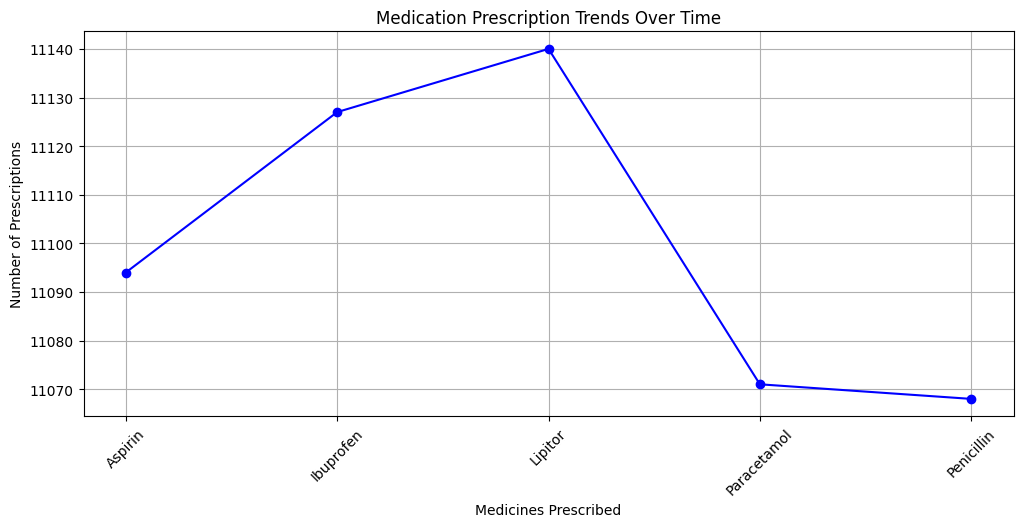

In [ ]:
# print("Medication Usage – Funnel Chart (For Prescription Trends) \n A funnel chart shows the drop-off from the most common to the least common prescribed medication.")

# medication_counts = base_data['Medication'].value_counts()

# fig = go.Funnel(
#     y=medication_counts.index[:10],
#     x=medication_counts.values[:10],
#     textinfo="value+percent initial"
# )

# go.Figure(fig).show()


# Group by medication to count prescriptions over time
medication_trend = base_data.groupby('Medication').size()

# Plot the line chart
plt.figure(figsize=(12, 5))
plt.plot(medication_trend.index, medication_trend.values, marker='o', linestyle='-', color='b')

# Labels and title
plt.title("Medication Prescription Trends Over Time")
plt.xlabel("Medicines Prescribed")
plt.ylabel("Number of Prescriptions")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

#**Analysis & Insights**
This line chart visualizes the frequency of different medications prescribed, helping us understand which drugs are most commonly used and whether there are any significant patterns in medication usage.

---

###**1. Identifying Most & Least Prescribed Medications**
* The peaks (high points) on the chart represent the most frequently prescribed medications.
* The lower points indicate less commonly used medications.
* If one or two medications dominate, they may be used to treat widespread conditions like hypertension, diabetes, or infections.

###**2. Understanding Prescription Trends & Healthcare Needs**
* A consistent prescription pattern across all medications suggests even distribution across different illnesses.
* A sharp drop-off in prescription counts suggests that only a few medications are used frequently, while others have limited demand.


###**3. Pharmaceutical & Inventory Management**
* Medications with high prescription counts need continuous stock availability.
* Less prescribed medications might have low demand but could still be critical for rare conditions.
* If certain medications show a recent increase in usage, hospitals and pharmacies should prepare for higher demand.

###**4. Impact of Public Health & Policy Changes**
* If certain medications show sudden spikes, it might indicate policy changes, new treatment protocols, or a disease outbreak.
* A gradual increase in chronic disease medications might suggest a rise in long-term health conditions like diabetes or heart disease.

---

#**Final Takeaway:**
This line chart helps track medication demand, analyze treatment patterns, and optimize hospital pharmacy management. It enables hospitals, pharmaceutical companies, and healthcare policymakers to make data-driven decisions for better healthcare planning and resource allocation.

📊💊 Understanding prescription trends ensures that hospitals remain well-stocked, patient needs are met, and public health initiatives are supported effectively. 🚑